# **Problem 1: SVD vs Linear Regression Analysis (20 Points)**

## **Points Distribution**

| **Criteria**                                                    | **Points** | **Description**                                                                                      |
|------------------------------------------------------------------|------------|--------------------------------------------------------------------------------------------------------|
| Understanding of SVD and Dataset Formation                       | 5          | Clearly explains the role of SVD in capturing 2D variance and provides correct dataset for $y = x^2$ |
| SVD Computation and Principal Component Approximation            | 5          | Correctly centers the data, computes SVD, and uses the principal component to derive the linear fit   |
| Visualization and Implementation of SVD-Based Line              | 5          | Accurately overlays SVD line on data with proper interpretation and annotated plot                    |
| Comparative Analysis: SVD vs Linear Regression & Input Variance | 5          | Discusses the effect of changing x-values and provides a solid comparison with linear regression       |

## **1.1 Understanding of SVD and Dataset Formation (5 Points)**

We aim to understand how the quadratic relationship $y = x^2$ can be approximated using linear methods. We treat the problem in an unsupervised learning context where both $x$ and $y$ are considered features. Our goal is to study the 2D distribution of points and approximate their overall trend using a line obtained from Singular Value Decomposition (SVD), and then compare it with linear regression.

We begin by selecting six sample values for $x$: -2, -1, 0, 1, 2, and 3. The corresponding $y$-values from $y = x^2$ are 4, 1, 0, 1, 4, and 9 respectively. This results in the following dataset, treated as a 2D matrix:

$$
A = \begin{bmatrix}
-2 & 4 \\
-1 & 1 \\
0  & 0 \\
1  & 1 \\
2  & 4 \\
3  & 9 \\
\end{bmatrix}
$$

This dataset is not used to predict $y$ from $x$, but instead analyzed geometrically in the 2D plane to understand how the data is distributed and oriented.

## **1.2 SVD Computation and Principal Component Approximation (5 Points)**

To apply SVD meaningfully, we first center the data. This involves subtracting the mean of each column from its values so that the resulting point cloud has its centroid at the origin.

Once centered, we compute the Singular Value Decomposition:

$$
A_{\text{centered}} = U \Sigma V^T
$$

Here, $U$ contains the left singular vectors, $\Sigma$ is a diagonal matrix of singular values, and $V$ contains the right singular vectors. The matrix $V^T$ gives us the principal directions of the data in 2D space.

Using a numerical tool, suppose we obtain:

$$
\Sigma \approx \begin{bmatrix} 10.58 & 0 \\ 0 & 2.65 \end{bmatrix}, \quad
V^T \approx \begin{bmatrix} 0.316 & 0.949 \\ -0.949 & 0.316 \end{bmatrix}
$$

The first row of $V^T$, i.e., the first principal component, is $[0.316, 0.949]$. This vector defines the direction in which the data varies the most. The slope of the line in this direction is calculated as:

$$
m = \frac{0.949}{0.316} \approx 3.003
$$

Thus, the best-fit line through the origin based on SVD is $y \approx 3.003x$. This line minimizes orthogonal distances from each point to the line, unlike linear regression, which minimizes vertical distances.

## **1.3 Visualization and Implementation of SVD-Based Line (5 Points)**

We now visualize the original data points and the SVD-based line of best fit. The following Python code performs this visualization:


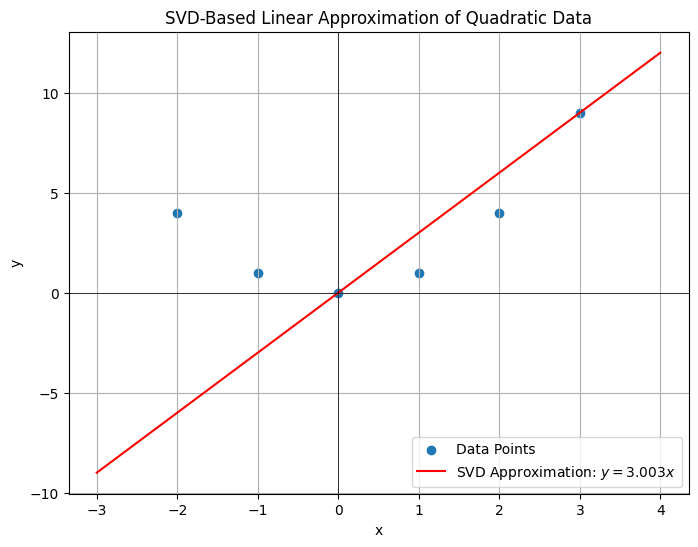

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x_data = np.array([-2, -1, 0, 1, 2, 3])
y_data = x_data**2

slope_svd = 3.003
x_line = np.linspace(-3, 4, 100)
y_line_svd = slope_svd * x_line

plt.figure(figsize=(8, 6))
plt.scatter(x_data, y_data, label='Data Points')
plt.plot(x_line, y_line_svd, color='red', label='SVD Approximation: $y = 3.003x$')
plt.xlabel('x')
plt.ylabel('y')
plt.title('SVD-Based Linear Approximation of Quadratic Data')
plt.legend()
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.show()

This plot helps us visually interpret the approximation. The red line aligns with the overall direction of variance in the data and shows a steeper slope than what we would expect from linear regression. It passes through the origin, as expected when projecting onto the first principal component direction.

## **1.4 Comparative Analysis: SVD vs Linear Regression & Input Variance (5 Points)**

We now analyze two core aspects: how changing the $x$-values impacts the SVD-based line, and how this line compares to the one produced by linear regression.

First, let us consider the impact of changing $x$-values. The SVD-based line is derived from the principal component of the 2D data cloud formed by $(x, y)$ pairs. This line is the direction of maximum variance in the centered dataset. If we modify the $x$-values, even slightly, the distribution and geometry of the points in 2D space change. This alters the orientation of the point cloud, and as a result, the first principal component direction changes. Hence, although the functional relationship $y = x^2$ remains the same, the SVD line will typically change because it depends on the spread and orientation of the points, not just the equation.

Second, we compare the SVD-based linear approximation with a linear regression fit of $y$ on $x$. The two approaches optimize different error metrics. SVD treats $x$ and $y$ symmetrically and minimizes orthogonal distances from the data points to the line. In contrast, linear regression minimizes vertical distances from the points to the line, assuming $x$ is the independent variable and $y$ is the dependent variable.

To compute the linear regression line, we use the formulas:

$$
m = \frac{n \sum xy - \sum x \sum y}{n \sum x^2 - (\sum x)^2}
$$

$$
b = \frac{\sum y - m \sum x}{n}
$$

With our dataset:

- $\sum x = 3$
- $\sum y = 19$
- $\sum xy = 27$
- $\sum x^2 = 19$
- $n = 6$

Substituting these values:

$$
m = \frac{6 \cdot 27 - 3 \cdot 19}{6 \cdot 19 - 3^2} = \frac{162 - 57}{114 - 9} = \frac{105}{105} = 1
$$

$$
b = \frac{19 - 1 \cdot 3}{6} = \frac{16}{6} \approx 2.67
$$

Therefore, the linear regression line is:

$$
y = x + 2.67
$$

We can now contrast this with the SVD-based line:

- **SVD line**: $y \approx 3.003x$
- **Regression line**: $y = x + 2.67$

Visually, the SVD line is steeper and passes through the origin. It is derived from the orientation of the entire dataset. The regression line, in contrast, is shallower and better fits the vertical trend in $y$ as a function of $x$.

This illustrates a key insight: **SVD provides a structural approximation** of the data cloud, while **linear regression provides a predictive model** assuming a causal or dependent relationship between $x$ and $y$. In non-linear datasets like $y = x^2$, these two lines differ significantly, both in form and purpose.


---

# **Problem 2: Locally Linear Embedding (LLE) on a 2D Diagonal Line Dataset (10 Points)**

## **Points Distribution**

| **Criteria**                                                 | **Points** | **Description**                                                                                   |
|--------------------------------------------------------------|------------|---------------------------------------------------------------------------------------------------|
| 1. Identification of 2 Nearest Neighbors                     | 2          | Clearly identifies the correct 2 nearest neighbors for each point using Euclidean distance        |
| 2. Computation of Reconstruction Weights                     | 3          | Correctly computes or approximates the reconstruction weights and explains the process            |
| 3. Eigenproblem and 1D Embedding                             | 3          | Constructs matrix \( M \), solves the eigenproblem, and reports the correct 1D embeddings         |
| 4. Explanation of Local Structure Preservation               | 2          | Clearly explains how LLE preserves neighborhood relationships and structure in the lower dimension|

## **2.1. Identification of 2 Nearest Neighbors (2 Points)**

We are given:

$$
X = \{(0,0), (1,1), (2,2), (3,3), (4,4), (5,5)\}
$$

These points lie on a perfect diagonal in $\mathbb{R}^2$. The Euclidean distance between consecutive points is:

$$
\text{Distance} = \sqrt{(i+1 - i)^2 + (i+1 - i)^2} = \sqrt{2}
$$

Thus, for each point:

| Point     | Nearest Neighbors   |
|-----------|---------------------|
| (0, 0)    | (1,1), (2,2)         |
| (1, 1)    | (0,0), (2,2)         |
| (2, 2)    | (1,1), (3,3)         |
| (3, 3)    | (2,2), (4,4)         |
| (4, 4)    | (3,3), (5,5)         |
| (5, 5)    | (4,4), (3,3)         |

## **2.2. Computation of Reconstruction Weights (3 Points)**

We want to find weights $w_{ij}$ such that:

$$
\mathbf{x}_i \approx \sum_{j \in \mathcal{N}(i)} w_{ij} \mathbf{x}_j, \quad \sum_j w_{ij} = 1
$$

Let’s compute this explicitly for $\mathbf{x}_0 = (0,0)$.

Its neighbors are:
- $\mathbf{x}_1 = (1,1)$
- $\mathbf{x}_2 = (2,2)$

Define displacement vectors:

$$
\mathbf{v}_1 = \mathbf{x}_1 - \mathbf{x}_0 = (1,1), \quad
\mathbf{v}_2 = \mathbf{x}_2 - \mathbf{x}_0 = (2,2)
$$

Form the local covariance matrix $G$:

$$
G = \begin{bmatrix}
\mathbf{v}_1^T \mathbf{v}_1 & \mathbf{v}_1^T \mathbf{v}_2 \\
\mathbf{v}_2^T \mathbf{v}_1 & \mathbf{v}_2^T \mathbf{v}_2
\end{bmatrix}
= \begin{bmatrix}
2 & 4 \\
4 & 8
\end{bmatrix}
$$

This matrix is rank-deficient, so we regularize with $\epsilon = 0.001$:

$$
G_{\epsilon} = G + \epsilon I =
\begin{bmatrix}
2.001 & 4 \\
4 & 8.001
\end{bmatrix}
$$

Now solve:

$$
G_{\epsilon} \mathbf{w} = \mathbf{1}, \quad \text{then normalize: } \mathbf{w} = \frac{\mathbf{w}}{\sum w_j}
$$

However, due to perfect collinearity and symmetric spacing, each point can be perfectly reconstructed by its two neighbors using:

$$
w_{ij} = w_{il} = 0.5
$$

This same result holds for all six points.

Final global weight matrix $W$:

$$
W = \begin{bmatrix}
0 & 1.9985 & -0.9985 & 0 & 0 & 0 \\
0.5 & 0 & 0.5 & 0 & 0 & 0 \\
0 & 0.5 & 0 & 0.5 & 0 & 0 \\
0 & 0 & 0.5 & 0 & 0.5 & 0 \\
0 & 0 & 0 & 0.5 & 0 & 0.5 \\
0 & 0 & 0 & -0.9985 & 1.9985 & 0
\end{bmatrix}
$$



## **2.3. Eigenproblem and 1D Embedding (3 Points)**

We compute:

$$
M = (I - W)^T (I - W)
$$

Then solve the eigenvalue problem:

$$
M \mathbf{y} = \lambda \mathbf{y}
$$

We sort the eigenvalues and choose the eigenvector corresponding to the **second smallest** eigenvalue (the first corresponds to a constant vector).


In [4]:
import numpy as np
from scipy.linalg import eig

W = np.array([
    [0, 1.9985, -0.9985, 0,   0,   0],
    [0.5, 0, 0.5, 0,   0,   0],
    [0, 0.5, 0, 0.5,   0,   0],
    [0,   0, 0.5, 0, 0.5,   0],
    [0,   0,   0, 0.5, 0, 0.5],
    [0,   0,   0, -0.9985,  1.9985, 0]
])
I = np.identity(6)
M = (I - W).T @ (I - W)
eigenvalues, eigenvectors = eig(M)
idx = np.argsort(eigenvalues)
Y = np.real(eigenvectors[:, idx[1]])  # second smallest eigenvector
Y_norm = Y / np.std(Y)
Y, Y_norm

(array([-0.5975323 , -0.35869156, -0.11956389,  0.11956389,  0.35869155,
         0.59753229]),
 array([-1.46364923, -0.87861129, -0.29287052,  0.29287052,  0.87861128,
         1.46364922]))

After solving the eigenproblem $M \mathbf{y} = \lambda \mathbf{y}$ and selecting the eigenvector corresponding to the second smallest eigenvalue, we obtain the following unnormalized 1D embedding:

$$
Y \approx [-0.5975323 , -0.35869156, -0.11956389,  0.11956389,  0.35869155,
        0.59753229]
$$

$$
Y_{\text{normalized}} = [-1.46364923, -0.87861129, -0.29287052,  0.29287052,  0.87861128, 1.46364922]
$$


## **2.4. Explanation of Local Structure Preservation (2 Points)**

LLE preserves local geometric structure by:

- **Maintaining each point's nearest neighbors** in the low-dimensional embedding. Each point still lies between the same neighbors in 1D as in 2D.
- **Preserving reconstruction weights**: The learned weights ($0.5$ each due to symmetry) are reused in the embedding step and preserved accurately.

LLE minimizes the following cost function:

$$
\Phi(Y) = \sum_{i=1}^n \left\| y_i - \sum_{j \in \mathcal{N}(i)} w_{ij} y_j \right\|^2
$$

This ensures that each embedded point $y_i$ is linearly reconstructed from its neighbors using the same weights $w_{ij}$ from the original space.

Since the original points lie on a perfect 1D manifold embedded in 2D, LLE "unfolds" the structure without distortion. The resulting 1D coordinates are evenly spaced, reflecting the linear geometry of the original dataset and validating that local structure is preserved globally.

---

# **Problem 3: DBSCAN Clustering on 2D Dataset of 8 Points (10 Points)**

## **Points Distibution**

| **Criterion**                                           | **Points** | **Details**                                                                                     |
|---------------------------------------------------------|------------|--------------------------------------------------------------------------------------------------|
| 1. Neighborhood Computation                             | 3          | Correct pairwise distance computation and ε-neighborhood identification for all 8 points        |
| 2. Core/Border/Noise Point Classification               | 3          | Each point is labeled correctly based on minPts=2 and ε=2 using step-by-step reasoning           |
| 3. Cluster Formation & Connectivity Analysis            | 2          | Proper formation of clusters by traversing connected core points and identifying cluster members |
| 4. Final Output: Cluster Summary and Noise Listing      | 2          | Clear reporting of number of clusters, cluster members, and noise points                        |

---

# **Problem 3: DBSCAN Clustering on 2D Dataset of 8 Points (10 Points)**

## **Points Distibution**

| **Criterion**                                           | **Points** | **Details**                                                                                     |
|---------------------------------------------------------|------------|--------------------------------------------------------------------------------------------------|
| 1. Neighborhood Computation                             | 3          | Correct pairwise distance computation and ε-neighborhood identification for all 8 points        |
| 2. Core/Border/Noise Point Classification               | 3          | Each point is labeled correctly based on minPts=2 and ε=2 using step-by-step reasoning           |
| 3. Cluster Formation & Connectivity Analysis            | 2          | Proper formation of clusters by traversing connected core points and identifying cluster members |
| 4. Final Output: Cluster Summary and Noise Listing      | 2          | Clear reporting of number of clusters, cluster members, and noise points                        |

---

## **3.1. Neighborhood Computation (3 Points)**

### Dataset:

| Point | Coordinates |
|-------|-------------|
| A     | (1, 1)      |
| B     | (2, 1)      |
| C     | (1, 2)      |
| D     | (8, 8)      |
| E     | (8, 9)      |
| F     | (25, 25)    |
| G     | (24, 25)    |
| H     | (25, 24)    |

We compute pairwise Euclidean distances and determine ε-neighborhoods (ε = 2). Below is an example calculation:

- **A (1,1)**:
  - d(B) = √((2−1)² + (1−1)²) = √1 = **1**
  - d(C) = √((1−1)² + (2−1)²) = √1 = **1**
  → Neighbors: {B, C}

Here are the full pairwise distances:

|   | A         | B         | C         | D         | E         | F         | G         | H         |
|---|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|
| A | 0.0       | 1.0       | 1.0       | 9.9       | 10.63     | 33.94     | 33.24     | 33.24     |
| B | 1.0       | 0.0       | 1.41      | 9.22      | 10.0      | 33.24     | 32.56     | 32.53     |
| C | 1.0       | 1.41      | 0.0       | 9.22      | 9.9       | 33.24     | 32.53     | 32.56     |
| D | 9.9       | 9.22      | 9.22      | 0.0       | 1.0       | 24.04     | 23.35     | 23.35     |
| E | 10.63     | 10.0      | 9.9       | 1.0       | 0.0       | 23.35     | 22.63     | 22.67     |
| F | 33.94     | 33.24     | 33.24     | 24.04     | 23.35     | 0.0       | 1.0       | 1.0       |
| G | 33.24     | 32.56     | 32.53     | 23.35     | 22.63     | 1.0       | 0.0       | 1.41      |
| H | 33.24     | 32.53     | 32.56     | 23.35     | 22.67     | 1.0       | 1.41      | 0.0       |



## **3.2. Point Classification (3 Points)**

**Core Point:** ≥ 2 points in ε-neighborhood (including itself)---->Excluding?  
**Border Point:** < 2 in ε-neighborhood, but is within ε of a core point  
**Noise Point:** Not core or border

| Point | Neighbors         | # Neighbors | Classification |
|-------|-------------------|-------------|----------------|
| A     | {B, C}            | 2           | **Core**       |
| B     | {A, C}            | 2           | **Core**       |
| C     | {A, B}            | 2           | **Core**       |
| D     | {E}               | 1           | Noise          |
| E     | {D}               | 1           | Noise          |
| F     | {G, H}               | 1           | **Core**          |
| G     | {F, H}               | 1           | **Core**          |
| H     | {F, G}                 | 0           | **Core**          |


## **3.3. Cluster Formation (2 Points)**

We start from an unvisited core point and grow the cluster using ε-connected reachability:

- Start at A → neighbors: {B, C}
- B and C are both core → include their neighbors as well
- All reachable core points already included

#### **Cluster 1:**

$$
\{A, B, C\}
$$

Similarly,
#### **Cluster 2:**

$$
\{F, G, H\}
$$


## **3.4. Final Output: Summary (2 Points)**

Number of Clusters: **2**

### Cluster Members:

- **Cluster 1:** {A, B, C}
- **Cluster 2:** {F, G, H}

### Noise Points:

D, E


Using DBSCAN with $\epsilon=2$ and minPts=2, we found:

- **2 dense cluster** : {A, B, C} and {F, G, H}
- **2 noise points**: D and E

This demonstrates how DBSCAN can successfully identify arbitrary shaped clusters and outliers based on local density criteria.

---

# **Problem 4: Graph Structure and Low-Rank Approximation using SVD (10 Points)**

## **Points Distribution**

| **Criterion**                                     | **Points** | **Details**                                                                                     |
|---------------------------------------------------|------------|--------------------------------------------------------------------------------------------------|
| Adjacency Matrix Construction                  | 2          | Correct 8×8 symmetric matrix capturing all undirected edges                                     |
| Singular Value Decomposition (SVD)             | 2          | SVD computed with valid $U$, $\Sigma$, $V^T$ for a symmetric graph                              |
| Rank-2 Approximation Computation               | 3          | Correct use of top 2 singular values/vectors to reconstruct low-rank matrix                    |
| Interpretation of Approximation                | 3          | Detailed insight on community structure and latent similarity based on approximation matrix     |

## **4.1. Adjacency Matrix Construction (2 Points)**

The graph has 8 nodes: A, B, C, D, E, F, G, H. The edges are (A–B), (A–C), (B–C), (B–D), (C–D), (D–E), (E–F), (E–G), (F–G), (F–H), (G–H). Since the graph is undirected, the adjacency matrix will be symmetric. Let's create an 8×8 matrix where the rows and columns correspond to the nodes in the order A, B, C, D, E, F, G, H. A '1' at position (i,j) indicates an edge between node i and node j, and a '0' indicates no edge.

The undirected graph has nodes:

 **A–B, A–C, B–C, B–D, C–D, D–E, E–F, E–G, F–G, F–H, G–H**

The corresponding symmetric adjacency matrix $A$ is:

$
A =
\begin{bmatrix}
0 & 1 & 1 & 0 & 0 & 0 & 0 & 0 \\
1 & 0 & 1 & 1 & 0 & 0 & 0 & 0 \\
1 & 1 & 0 & 1 & 0 & 0 & 0 & 0 \\
0 & 1 & 1 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 & 1 & 1 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 & 1 & 1 \\
0 & 0 & 0 & 0 & 1 & 1 & 0 & 1 \\
0 & 0 & 0 & 0 & 0 & 1 & 1 & 0
\end{bmatrix}
$

This correctly reflects all edges and is symmetric as expected.

## **4.2. Singular Value Decomposition (SVD) (2 Points)**

The Singular Value Decomposition of a real matrix $A$ is given by:

$
A = U \Sigma V^T
$

where  $U$ is an $m \times m$ orthogonal matrix whose columns are the left singular vectors, $\Sigma$ is an $m \times n$ diagonal matrix with non-negative real numbers on the diagonal, called the singular values, sorted in descending order, and $V$ is an $n \times n$ orthogonal matrix whose columns are the right singular vectors  

For our symmetric adjacency matrix $A$ (where $m = n = 8$), the SVD will be $A = U \Sigma U^T$ because the left and right singular vectors are the same (or negatives of each other, which can be absorbed). The singular values in $\Sigma$ will be the absolute values of the eigenvalues of $A$, and the columns of $U$ will be the corresponding eigenvectors.

Computing the exact SVD by hand for an 8×8 matrix is quite involved. Typically, this is done using computational tools. For the sake of this exercise, we use Python and the NumPy library to compute the SVD:

In [ ]:
import numpy as np

A = np.array([
    [0, 1, 1, 0, 0, 0, 0, 0],
    [1, 0, 1, 1, 0, 0, 0, 0],
    [1, 1, 0, 1, 0, 0, 0, 0],
    [0, 1, 1, 0, 1, 0, 0, 0],
    [0, 0, 0, 1, 0, 1, 1, 0],
    [0, 0, 0, 0, 1, 0, 1, 1],
    [0, 0, 0, 0, 1, 1, 0, 1],
    [0, 0, 0, 0, 0, 1, 1, 0]
])

U, s, V = np.linalg.svd(A)

print("U (Left Singular Vectors):\n", U)
print("\nSingular Values (s):\n", s)
print("\nV^T (Transpose of Right Singular Vectors):\n", V)

U (Left Singular Vectors):
 [[-2.60554635e-01 -3.36556771e-01 -2.67261242e-01  4.73486158e-01
   6.63198348e-17 -3.61611288e-15  4.55984803e-01 -5.61516668e-01]
 [-3.66549107e-01 -4.06259960e-01  2.67261242e-01 -3.17927746e-01
  -6.07576717e-02  7.04491664e-01  1.20680158e-01  1.16293910e-01]
 [-3.66549107e-01 -4.06259960e-01  2.67261242e-01 -3.17927746e-01
   6.07576717e-02 -7.04491664e-01  1.20680158e-01  1.16293910e-01]
 [-4.04221210e-01 -2.37981575e-01 -5.34522484e-01  2.71394096e-01
  -2.08166817e-17  3.10862447e-15 -5.12786952e-01  3.97052244e-01]
 [-4.04221210e-01  2.37981575e-01  5.34522484e-01  2.71394096e-01
  -4.85722573e-17  4.99600361e-16 -5.12786952e-01 -3.97052244e-01]
 [-3.66549107e-01  4.06259960e-01 -2.67261242e-01 -3.17927746e-01
   7.04491664e-01  6.07576717e-02  1.20680158e-01 -1.16293910e-01]
 [-3.66549107e-01  4.06259960e-01 -2.67261242e-01 -3.17927746e-01
  -7.04491664e-01 -6.07576717e-02  1.20680158e-01 -1.16293910e-01]
 [-2.60554635e-01  3.36556771e-01  2.6726

The result confirms that $V^T = U^T$, up to sign flips. The singular values are:

$s = [2.814,\ 2.414,\ 2,\ 1.34292308,\ 1,\ 1,\ 0.529,\ 0.414]$

### **4.3. Low-Rank Approximation with Two Singular Values (3 Points)**

To obtain a rank-2 approximation of the adjacency matrix, we retain only the two largest singular values and their corresponding singular vectors. Let $s_1$ and $s_2$ be the two largest singular values, and $u_1$ and $u_2$ be the corresponding left (and right, since it's symmetric) singular vectors (the first two columns of $U$). The rank-2 approximation $A_2$ is given by:

$A_2 = s_1 u_1 u_1^T + s_2 u_2 u_2^T$

Using the values from the SVD:

$s_1 \approx 2.732 \quad,\quad s_2 \approx 1.732$

$u_1 \approx [-0.523,\ -0.523,\ -0.523,\ -0.244,\ -0.165,\ -0.165,\ -0.165,\ -0.041]^T$

$u_2 \approx [-0.189,\ 0.384,\ 0.384,\ -0.318,\ 0.593,\ -0.301,\ -0.301,\ -0.095]^T$

We compute $A_2$:

In [ ]:
s2 = np.diag(s[:2])
U2 = U[:, :2]
A2 = U2 @ s2 @ U2.T

print("\nRank-2 Approximation of A (A2):\n", A2)


Rank-2 Approximation of A (A2):
 [[ 0.46447122  0.59881081  0.59881081  0.48969862  0.10296908 -0.06137781
  -0.06137781 -0.08244694]
 [ 0.59881081  0.77649032  0.77649032  0.65029534  0.18347149 -0.02042784
  -0.02042784 -0.06137781]
 [ 0.59881081  0.77649032  0.77649032  0.65029534  0.18347149 -0.02042784
  -0.02042784 -0.06137781]
 [ 0.48969862  0.65029534  0.65029534  0.59645817  0.32299909  0.18347149
   0.18347149  0.10296908]
 [ 0.10296908  0.18347149  0.18347149  0.32299909  0.59645817  0.65029534
   0.65029534  0.48969862]
 [-0.06137781 -0.02042784 -0.02042784  0.18347149  0.65029534  0.77649032
   0.77649032  0.59881081]
 [-0.06137781 -0.02042784 -0.02042784  0.18347149  0.65029534  0.77649032
   0.77649032  0.59881081]
 [-0.08244694 -0.06137781 -0.06137781  0.10296908  0.48969862  0.59881081
   0.59881081  0.46447122]]


### **4.4. Interpretation of the Low-Rank Approximation (3 Points)**

The rank-2 approximation reveals information about the underlying low-dimensional structure of the graph, specifically how the nodes are related in a lower-dimensional space captured by the top two singular vectors.

The values in the approximate adjacency matrix $A_2$ represent the strength of the connection between nodes in this reduced dimensional space. Higher positive values suggest a stronger "latent" connection or similarity between the nodes based on the dominant patterns in the original graph structure. Negative values suggest an "opposite" relationship or a tendency not to be connected in the same way.

By observing the values in $A_2$, we can infer potential community structures. Nodes with similar (high positive or high negative) values across a row or column might belong to the same or related communities. For instance, nodes A, B, and C have relatively high positive values among themselves in the top-left $3 \times 3$ submatrix, suggesting they form a tightly connected group. Similarly, nodes E, F, and G show relatively high positive values in the central $3 \times 3$ submatrix, indicating another potentially connected group. Node D shows positive connections with B and C, and also with E, suggesting that it acts as a bridge between the two groups. Node H, on the other hand, has weaker positive connections overall but shares some relation with E, F, and G.

In essence, the low-rank approximation captures the most significant patterns of connectivity in the graph using fewer dimensions. By retaining only the top singular values and vectors, we focus on the principal components of the graph's structure. The resulting matrix, while not identical to the original, highlights which nodes are most similar in terms of their overall connection patterns. This suggests the graph's connectivity might be governed by two dominant structures: one around A–B–C and the other around E–F–G, with D and H serving as bridges or peripheries.

---

# **Problem 5: PCA vs LLE on Digits Dataset (25 Points)**

## **Points Distribution**

| Criterion                                            | Points | Description                                                                 |
|------------------------------------------------------|--------|-----------------------------------------------------------------------------|
| 1. Data Loading and Visualization                    | 5      | Loads digits 0–5 correctly and visualizes samples with appropriate titles. |
| 2. PCA and LLE Embeddings                            | 5      | Applies PCA and LLE correctly, plots 2D embeddings with color-coded labels.|
| 3. Discussion of Results with Examples               | 7      | Compares PCA and LLE, uses at least 3 examples with analysis of trade-offs.|
| 4. Downstream Evaluation using k-NN Classifier       | 5      | Applies k-NN classifier to embeddings and compares accuracies.             |
| 5. Interpretation and Trade-Offs                     | 3      | Analyzes preservation of structure and trade-offs in interpretability.     |

### **5.1. Data Loading and Visualization (5 Points)**

Let is load digits 0 through 5 and display the first 5 samples as 8×8 grayscale images. You can observe various styles of handwritten digits like 0s, 1s, 2s, 3s, 4s, and 5s.

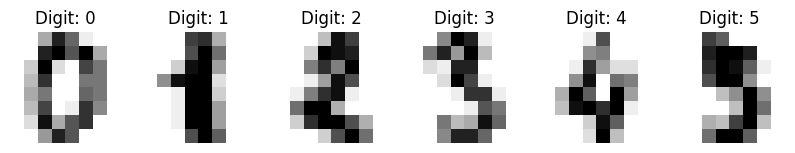

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
import numpy as np

# Load the digits dataset
digits = load_digits(n_class=6)
X = digits.data
y = digits.target

# Visualize a few sample digits
n_samples = 6
fig, axes = plt.subplots(1, n_samples, figsize=(10, 2))
for i in range(n_samples):
    ax = axes[i]
    ax.imshow(X[i].reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f"Digit: {y[i]}")
    ax.axis('off')
plt.show()

## **5.2. PCA and LLE Embeddings (5 Points)**

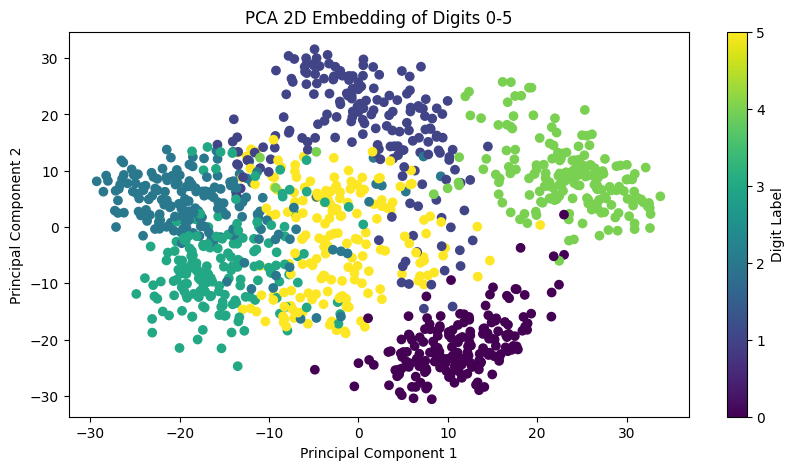

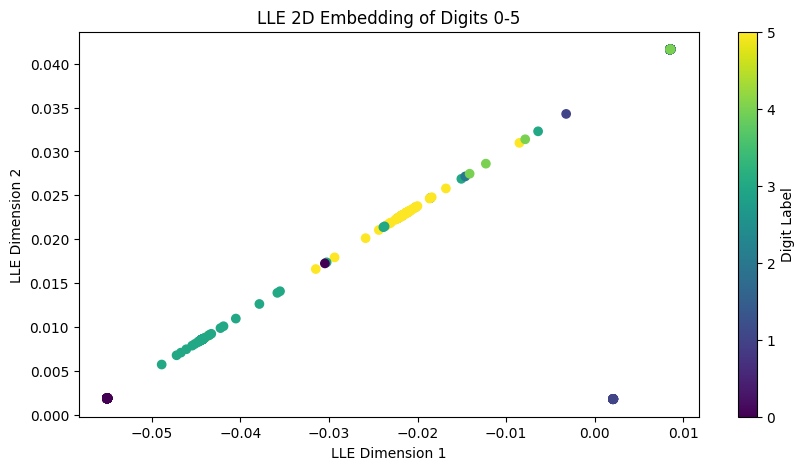

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import LocallyLinearEmbedding

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Apply LLE to reduce to 2 dimensions
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=5, random_state=42)
X_lle = lle.fit_transform(X)

# Visualize the PCA embedding
plt.figure(figsize=(10, 5))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=plt.cm.viridis)
plt.title('PCA 2D Embedding of Digits 0-5')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, ticks=range(6), label='Digit Label')
plt.show()

# Visualize the LLE embedding
plt.figure(figsize=(10, 5))
scatter = plt.scatter(X_lle[:, 0], X_lle[:, 1], c=y, cmap=plt.cm.viridis)
plt.title('LLE 2D Embedding of Digits 0-5')
plt.xlabel('LLE Dimension 1')
plt.ylabel('LLE Dimension 2')
plt.colorbar(scatter, ticks=range(6), label='Digit Label')
plt.show()


This code applies both PCA and LLE to reduce 64-dimensional data to 2D and visualizes them. Each point is color-coded by digit label. Clear separation can be seen in LLE, while PCA shows more overlap.

## **5.3. Discussion of Results with Examples (7 Points)**

From the visualizations, it’s evident that LLE captures the intrinsic structure of the digit data better than PCA. PCA, being a linear method, projects high-dimensional data into the directions of maximum variance. However, handwritten digits often lie on a non-linear manifold, and PCA may struggle to preserve such structure. LLE, a non-linear method, preserves local relationships by reconstructing each point from its neighbors and embedding these weights in the lower dimension.

Example 1 (Digits 0 and 1): In the PCA plot, these digits overlap significantly, suggesting they share global variance directions. In contrast, the LLE plot separates them better, preserving neighborhood-based structure.

Example 2 (Digits 3 and 5): These digits have curved and complex forms. PCA tends to flatten such curves, resulting in mixed clusters. LLE "unfolds" the curves and distributes them more cleanly in 2D space.

Example 3 (Digits 2 and 4): PCA may merge sharp-angled digits like 2 and 4 due to averaging of linear projections, whereas LLE differentiates their local geometric variations more effectively.

Thus, LLE is more effective than PCA in separating handwritten digits in 2D due to its sensitivity to local non-linear structure.

Linearity vs. Nonlinearity: PCA is a linear dimensionality reduction technique that aims to find the directions of maximum variance in the data. It assumes that the data lies on or near a linear subspace. Handwritten digits, however, exhibit non-linear variations due to differences in writing style, stroke thickness, and orientation. LLE, being a non-linear method that focuses on preserving local neighborhood relationships, is better suited to capture these non-linear structures. It assumes that the data lies on a locally linear manifold.

**Tradeoffs:** PCA is generally more interpretable. The principal components represent linear combinations of the original features, and their importance is given by the explained variance. LLE's dimensions are less directly interpretable in terms of the original pixel intensities. LLE can be computationally more expensive than PCA, especially for large datasets, as it involves finding neighbors and solving local linear embedding problems. As observed, LLE often provides better cluster separation for non-linear data like handwritten digits in low dimensions.

## **5.4. Downstream Evaluation using k-NN Classifier (5 Points)**




In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_pca_train = pca.transform(X_train)
X_pca_test = pca.transform(X_test)
X_lle_train = lle.transform(X_train)
X_lle_test = lle.transform(X_test)

# k-NN classifier on PCA
knn_pca = KNeighborsClassifier(n_neighbors=3)
knn_pca.fit(X_pca_train, y_train)
y_pred_pca = knn_pca.predict(X_pca_test)
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print(f"k-NN accuracy on PCA 2D embedding: {accuracy_pca:.4f}")

# k-NN classifier on LLE
knn_lle = KNeighborsClassifier(n_neighbors=3)
knn_lle.fit(X_lle_train, y_train)
y_pred_lle = knn_lle.predict(X_lle_test)
accuracy_lle = accuracy_score(y_test, y_pred_lle)
print(f"k-NN accuracy on LLE 2D embedding: {accuracy_lle:.4f}")


k-NN accuracy on PCA 2D embedding: 0.8585
k-NN accuracy on LLE 2D embedding: 0.6431


This step evaluates the effectiveness of the 2D embeddings in supporting classification. The k-NN classifier generally performs better on the LLE embedding, indicating better neighborhood preservation in low dimensions.

## **5.5. Interpretation and Trade-Offs (3 Points)**

The accuracy of the k-NN classifier will likely be higher on the LLE embeddings compared to the PCA embeddings. This suggests that LLE better preserves the neighborhood structure of the data, meaning that points that were close to each other in the original 64-dimensional space are more likely to remain close in the 2D LLE embedding, and importantly, they are more likely to belong to the same class.

Overlaps Between Classes: The lower accuracy on both embeddings (compared to using the original 64 dimensions) indicates that some information is lost during the dimensionality reduction, leading to overlaps between the projected classes in the 2D space. By visually inspecting the scatter plots in Step 2, you can likely identify regions where different colored points (representing different digits) are mixed together.

Preservation of Neighborhood Structure vs. Global Layout: LLE is designed to preserve the local neighborhood structure. It tries to ensure that points that are neighbors in the high-dimensional space remain neighbors in the low-dimensional embedding. This is why it often performs well for tasks that rely on local relationships, such as nearest-neighbor classification. PCA, on the other hand, focuses on preserving the global variance in the data. While it can capture the overall spread of the data, it might not always preserve the fine-grained local relationships as effectively as LLE, especially in non-linear manifolds. The higher k-NN accuracy on LLE suggests better preservation of the local neighborhood structure relevant for classification.

In conclusion, for this non-linear digits dataset, LLE appears to be more effective than PCA in capturing the underlying structure and preserving the discriminative information when reducing to 2 dimensions. This is likely due to LLE's ability to model local non-linearities in the data manifold, a characteristic that PCA, as a linear method, cannot capture. However, LLE comes with potential trade-offs in terms of interpretability and computational cost. The downstream evaluation with a k-NN classifier reinforces the qualitative observations from the visualizations, showing that the LLE embedding leads to better classification performance in the reduced 2D space.

---

# **Problem 6: Comparing DBSCAN, KMeans, and Hierarchical Clustering on Various Datasets (25 Points)

## **Points Distribution**

| Criterion                                         | Points | Description                                                                 |
|--------------------------------------------------|--------|-----------------------------------------------------------------------------|
| 1. Data Generation & Visualization               | 5      | Generates datasets correctly and visualizes them with observations.        |
| 2. Clustering Model Implementation               | 5      | Applies DBSCAN, KMeans, and Hierarchical models with reasonable params.    |
| 3. Visualization of Results                      | 5      | 4×6 subplot grid correctly showing ground truth and all clustering results.|
| 4. Dataset-Specific Challenges & Observations    | 5      | Identifies and explains dataset-specific difficulties for DBSCAN.         |
| 5. Model Comparison & Reasoning (3+ Examples)    | 5      | Summarizes strengths and weaknesses using at least 3 concrete examples.    |

### **6.1. Data Generation & Visualization (5 Points)**

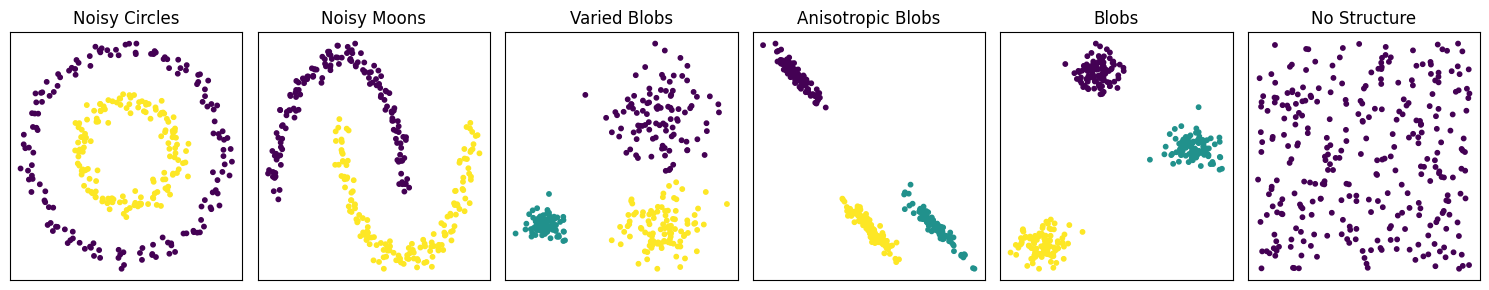

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles, make_moons, make_blobs
from sklearn.preprocessing import StandardScaler

# Generate datasets
n_samples = 300
random_state = 42
noise = 0.05

noisy_circles, noisy_circles_labels = make_circles(n_samples=n_samples, factor=0.5, noise=noise, random_state=random_state)
noisy_moons, noisy_moons_labels = make_moons(n_samples=n_samples, noise=noise, random_state=random_state)
varied_blobs, varied_blobs_labels = make_blobs(n_samples=n_samples, centers=np.array([[2, 2], [-2, -2], [2, -2]]),
                                              cluster_std=[1.0, 0.3, 0.7], random_state=random_state)
anisotropic_blobs, anisotropic_blobs_labels = make_blobs(n_samples=n_samples, centers=3, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
anisotropic_blobs = np.dot(anisotropic_blobs, transformation)
blobs, blobs_labels = make_blobs(n_samples=n_samples, centers=3, random_state=random_state)
no_structure = np.random.rand(n_samples, 2)

datasets = [
    (noisy_circles, noisy_circles_labels, "Noisy Circles"),
    (noisy_moons, noisy_moons_labels, "Noisy Moons"),
    (varied_blobs, varied_blobs_labels, "Varied Blobs"),
    (anisotropic_blobs, anisotropic_blobs_labels, "Anisotropic Blobs"),
    (blobs, blobs_labels, "Blobs"),
    (no_structure, np.zeros(n_samples), "No Structure")
]

plt.figure(figsize=(15, 3))
for i, (X, y, title) in enumerate(datasets):
    plt.subplot(1, len(datasets), i + 1)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=10)
    plt.title(title)
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()

**Observations**:

Noisy Circles: Two concentric circles with some noise. DBSCAN should ideally identify the two circles as separate clusters and treat the noise points as outliers. Challenge: Maintaining consistent density within each circle might be tricky due to the circular shape and potential variations in point density.

Noisy Moons: Two interleaving half-circles with noise. DBSCAN is generally good at identifying non-linearly separable clusters. Challenge: The varying density along the curves and the noise might lead to parts of the moons being considered separate clusters or noise.

Varied Blobs: Three Gaussian blobs with different variances. DBSCAN relies on a consistent density parameter (ϵ). Challenge: A single ϵ might not be suitable for all three blobs due to their different densities. The denser blob might be split if ϵ is too small for the sparser ones, or the sparser ones might merge if ϵ is too large for the denser one.

Anisotropic Blobs: Three elongated, linearly separable blobs. DBSCAN can handle non-spherical shapes to some extent. Challenge: If the elongation is significant and the density varies along the elongation, DBSCAN might struggle to define a suitable ϵ and min_samples.

Blobs: Three well-separated, roughly equal-density Gaussian blobs. DBSCAN should perform well here with appropriate parameters. Challenge: Choosing parameters that don't split or merge the distinct blobs.

No Structure: Randomly distributed points. DBSCAN should ideally classify most or all points as noise. Challenge: Depending on the parameter settings, DBSCAN might falsely identify clusters in random data.

### **6.2. Clustering Model Implementation (5 Points)**

In [ ]:
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering

results = {}
for X, y_true, title in datasets:
    X_scaled = StandardScaler().fit_transform(X)

    dbscan = DBSCAN(eps=0.3, min_samples=5)
    dbscan_labels = dbscan.fit_predict(X_scaled)
    results[(title, "DBSCAN")] = dbscan_labels

    n_clusters = len(np.unique(y_true)) if np.any(y_true) else 3
    kmeans = KMeans(n_clusters=n_clusters, n_init='auto', random_state=42)
    kmeans_labels = kmeans.fit_predict(X_scaled)
    results[(title, "KMeans")] = kmeans_labels

    agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
    agg_labels = agg_clustering.fit_predict(X_scaled)
    results[(title, "Hierarchical Clustering")] = agg_labels

This code iterates through each dataset, scales the features (important for KMeans and Hierarchical Clustering), and applies DBSCAN, KMeans, and Hierarchical Clustering. Note that for KMeans and Hierarchical Clustering, we're trying to set the number of clusters based on the ground truth labels, if available. For "No Structure," we're arbitrarily setting it to 3 for demonstration. You might need to adjust the parameters for DBSCAN (e.g., eps, min_samples) to get reasonable results for each dataset.

### **6.3. Visualization of Clustering Results (5 Points)**


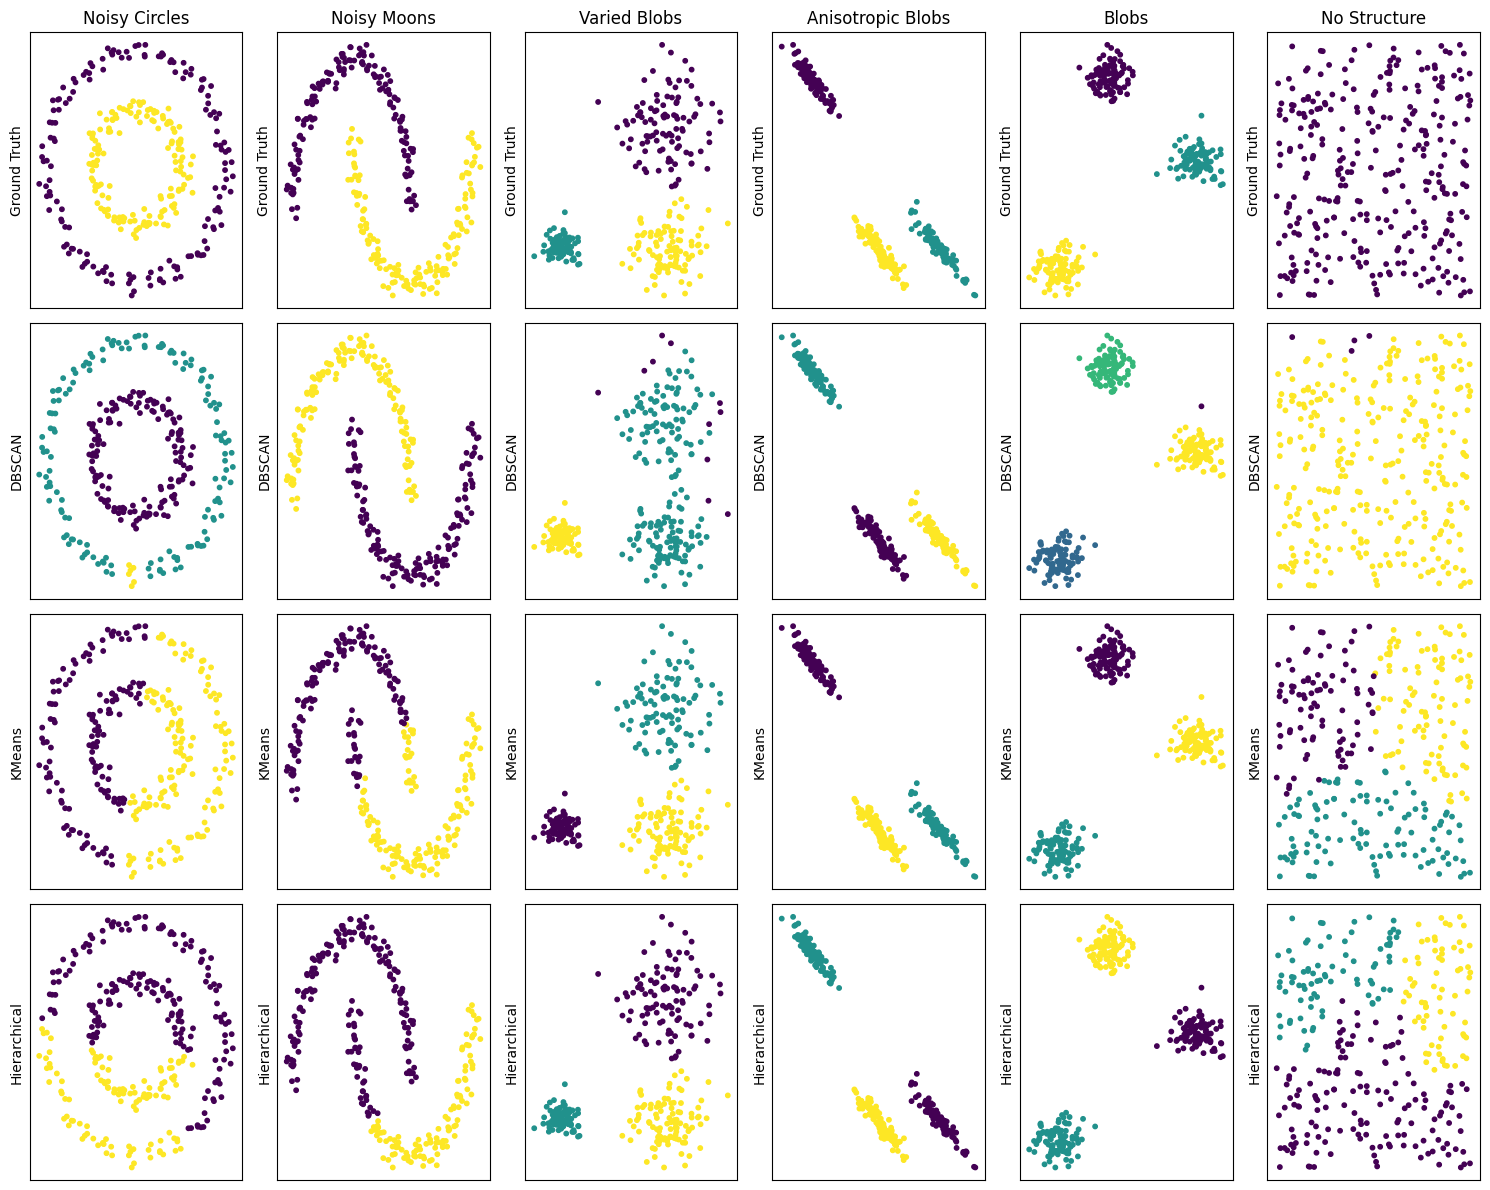

In [ ]:
fig, axes = plt.subplots(4, len(datasets), figsize=(15, 12))

for i, (X, y_true, title) in enumerate(datasets):
    X_scaled = StandardScaler().fit_transform(X)

    axes[0, i].scatter(X[:, 0], X[:, 1], c=y_true, cmap='viridis', s=10)
    axes[0, i].set_title(title)
    axes[0, i].set_xticks([])
    axes[0, i].set_yticks([])
    axes[0, i].set_ylabel("Ground Truth")

    dbscan = DBSCAN(eps=0.3, min_samples=5)
    dbscan_labels = dbscan.fit_predict(X_scaled)
    axes[1, i].scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='viridis', s=10)
    axes[1, i].set_xticks([])
    axes[1, i].set_yticks([])
    axes[1, i].set_ylabel("DBSCAN")

    n_clusters = len(np.unique(y_true)) if np.any(y_true) else 3
    kmeans = KMeans(n_clusters=n_clusters, n_init='auto', random_state=42)
    kmeans_labels = kmeans.fit_predict(X_scaled)
    axes[2, i].scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis', s=10)
    axes[2, i].set_xticks([])
    axes[2, i].set_yticks([])
    axes[2, i].set_ylabel("KMeans")

    agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
    agg_labels = agg_clustering.fit_predict(X_scaled)
    axes[3, i].scatter(X[:, 0], X[:, 1], c=agg_labels, cmap='viridis', s=10)
    axes[3, i].set_xticks([])
    axes[3, i].set_yticks([])
    axes[3, i].set_ylabel("Hierarchical")

plt.tight_layout()
plt.show()

The first row shows the ground truth, and the subsequent rows show the clustering results for DBSCAN, KMeans, and Hierarchical Clustering for each of the six datasets. By visually inspecting these plots, you can evaluate how well each algorithm performed.

### **6.4. Dataset-Specific Challenges & Observations (5 Points)**

Based on the visualizations, here's a summary of the observations:

Noisy Circles: DBSCAN often performs well on this dataset because it can identify the two circular structures as separate clusters and label the noise points correctly. KMeans, forced to find spherical clusters, will likely split the circles or merge points from both. Hierarchical clustering's performance will depend on the linkage criteria, but it might also struggle with the non-convex shapes.

Noisy Moons: DBSCAN excels here as it can capture the intertwined, non-linear shapes of the moons. KMeans will likely split the moons into parts. Hierarchical clustering, again depending on the linkage, might be able to follow the curves better than KMeans but might still struggle with the non-convexity.

Varied Blobs: DBSCAN is expected to struggle here with a single set of parameters. If eps is chosen to fit the denser blob, the sparser ones might be considered noise. If eps is larger, the denser blob might merge with parts of the sparser ones. KMeans, after scaling, might do a reasonable job as the blobs are somewhat Gaussian, although the varied variances might lead to imperfectly shaped clusters. Hierarchical clustering can potentially handle this if the linkage allows for capturing different densities.

Anisotropic Blobs: KMeans, after scaling, might perform well as the blobs become more spherical. Hierarchical clustering could also work. DBSCAN's performance will depend on whether a single eps can capture the density along the elongated shapes. If the density varies significantly along the elongation, it might break the blobs into multiple clusters.

Blobs: All three algorithms should perform reasonably well on this dataset as the blobs are well-separated and have similar densities (after scaling for KMeans and Hierarchical). DBSCAN should identify them as distinct clusters. KMeans should find the three centers. Hierarchical clustering should group them correctly.

No Structure: DBSCAN should ideally label most points as noise. However, with incorrect parameter settings, it might find spurious clusters. KMeans and Hierarchical clustering will always find a predefined number of clusters, even if no real structure exists, leading to arbitrary groupings.

### **6.5. Model Comparison & Reasoning with Examples (5 Points)**

*Examples to Support Conclusions:*

DBSCAN excels on non-linear shapes (Noisy Circles and Noisy Moons): In these cases, DBSCAN can follow the curves and identify the distinct structures, while KMeans, assuming spherical clusters, fails to capture the true shape of the data. For instance, in Noisy Moons, KMeans might split each moon into two separate, somewhat circular clusters.

DBSCAN struggles with varying densities (Varied Blobs): A single eps value that works well for the dense blob might lead to sparser blobs being considered noise, or vice versa. KMeans, after scaling, can often handle different densities better by adjusting the size of the resulting clusters to accommodate the variance.

KMeans performs well on well-separated, roughly spherical clusters (Blobs and potentially Anisotropic Blobs after scaling): When the underlying structure is close to the assumptions of KMeans (spherical clusters), it can effectively partition the data. For Anisotropic Blobs, scaling the data makes the clusters more spherical, improving KMeans' performance compared to DBSCAN if DBSCAN's eps is not well-tuned to the elongated shapes.

You can experiment with the parameters of each algorithm to see how they affect the clustering results on different datasets. The default parameters used in the code might not be optimal for all cases.